<a href="https://colab.research.google.com/github/Crimpychimp777/actions-learning-pathway/blob/SUU-Data-Analytics-1-6100/Logistic_Regression_Hands_On_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pima Indians Diabetes Case study
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Researchers at the Bio-Solutions lab want to get better understanding of this disease among women and are planning to use machine learning models that will help them to identify patients who are at risk of diabetes.

We will use logistic regression to model the "Pima Indians Diabetes" data set. In particular, all patients here are females at least 21 years old of Pima Indian heritage. This model will predict which people are likely to develop diabetes.

## Data Description:

* Pregnancies: Number of times pregnant
* Glucose: Plasma glucose concentration over 2 hours in an oral glucose tolerance test
* BloodPressure: Diastolic blood pressure (mm Hg)
* SkinThickness: Triceps skinfold thickness (mm)
* Insulin: 2-Hour serum insulin (mu U/ml)
* BMI: Body mass index (weight in kg/(height in m)^2)
* Pedigree: Diabetes pedigree function - A function that scores likelihood of diabetes based on family history.
* Age: Age in years
* Class: Class variable (0: the person is not diabetic or 1: the person is diabetic)

### Import necessary libraries

In [1]:
# To filter the warnings
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Library to split data
from sklearn.model_selection import train_test_split


# To build linear model for statistical analysis and prediction
import statsmodels.stats.api as sms
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

# To get diferent metric scores
from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, confusion_matrix, roc_auc_score




### Read the dataset

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv("/content/drive/MyDrive/SUU Data Analytics/Module 5/pima-indians-diabetes .csv")

### View the first and last 5 rows of the dataset

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Class
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Class          768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Understand the shape of the dataset

In [7]:
data.shape

(768, 9)

* There are 768 observations and 9 columns in the dataset

### Checking for null values in the data

In [8]:
data.isnull().values.any()

np.False_

* We don't have missing values in the data.

#### Distribution of variables in the data

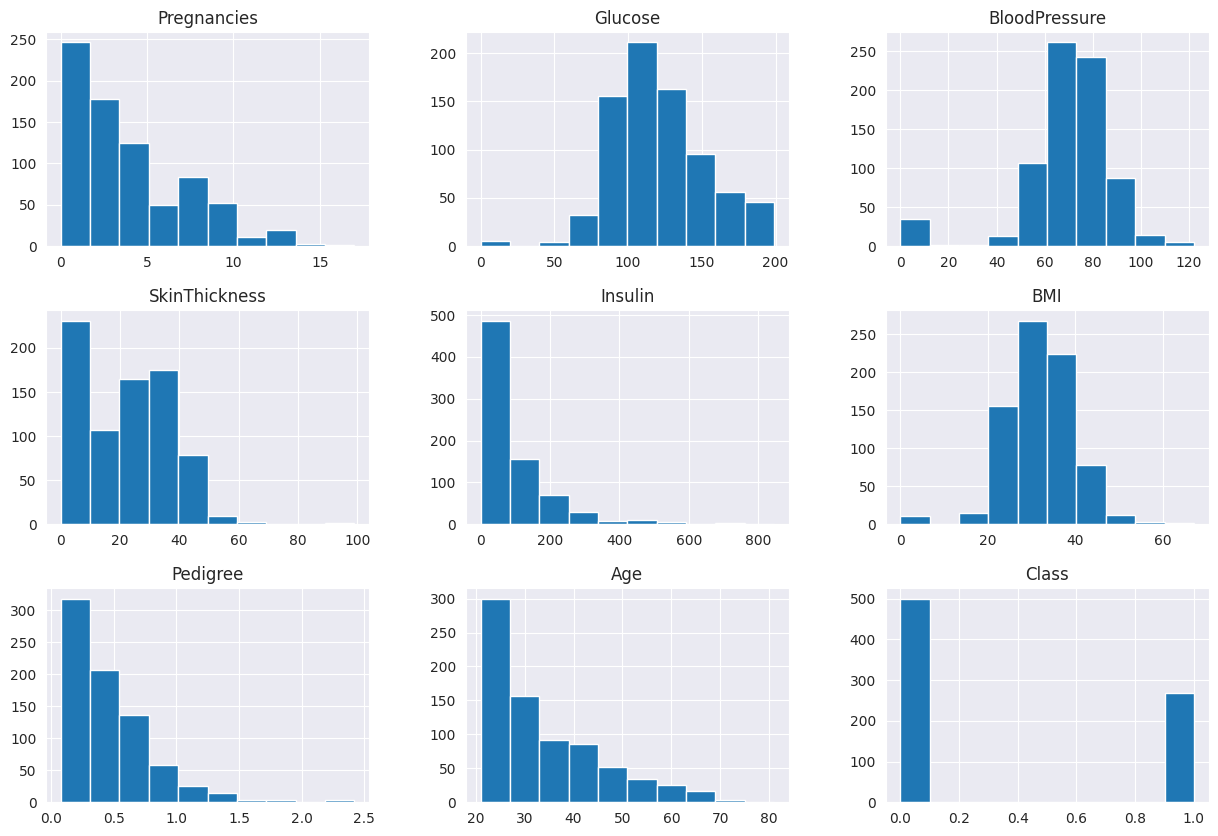

In [9]:
# let's check the histogram of each variable
sns.set_style("darkgrid")
data.hist(figsize=(15, 10))
plt.show()

* We can see that Glucose, BloodPressure, SkinThickness, Insulin, BMI have obervations with 0 values, which is not possible. These are data entry errors and we should fix it.
* We will replace 0 values in all the columns except Pregnancies and Class with the NaN.
* We will impute missing (NaN) values with the mean.





In [10]:
# defining columns where we need to replace 0 with NaN
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Pedigree"]

In [11]:
# replacing 0 with NaN
data[cols] = data[cols].replace(0, np.nan)

In [12]:
# let's check missing values in the data again
data.isna().sum()

,0
Pregnancies,0
Glucose,5
BloodPressure,35
SkinThickness,227
Insulin,374
BMI,11
Pedigree,0
Age,0
Class,0


In [13]:
# Let's impute missing values using mean value
data[cols] = data[cols].fillna(data[cols].mean())

In [14]:
# let's check missing values in the data again
data.isna().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
Pedigree,0
Age,0
Class,0


* We have imputed all the data entry errors with the mean values.

### Bivariate Analysis

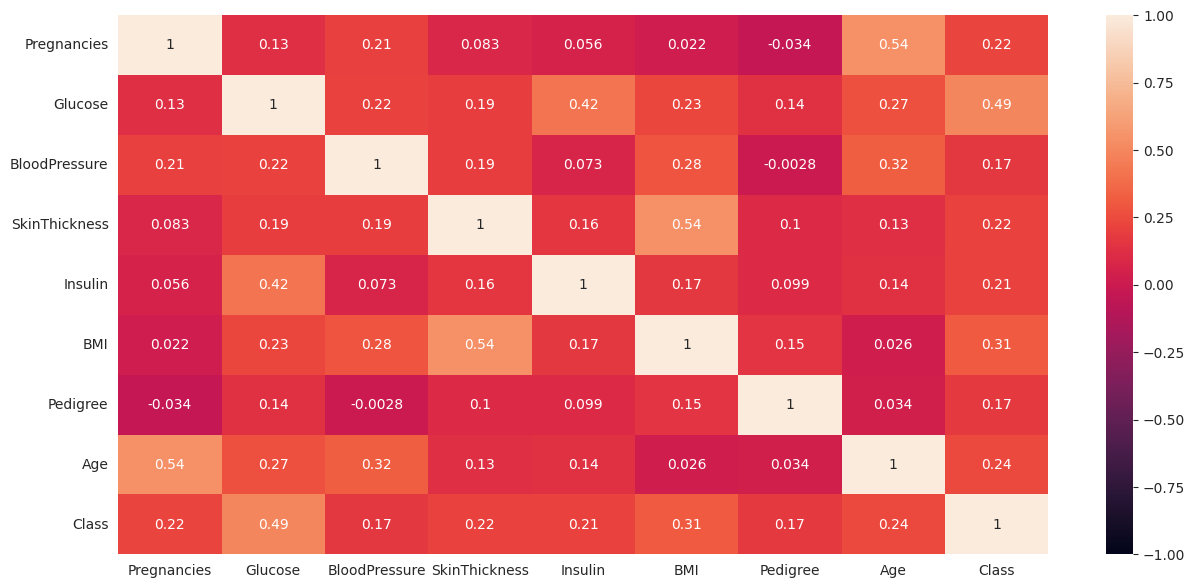

In [18]:
plt.figure(figsize=(15, 7))
sns.heatmap(data.corr(), annot=True, vmin=-1, vmax=1)
plt.show()

* No significant case of high correlation among variables observed

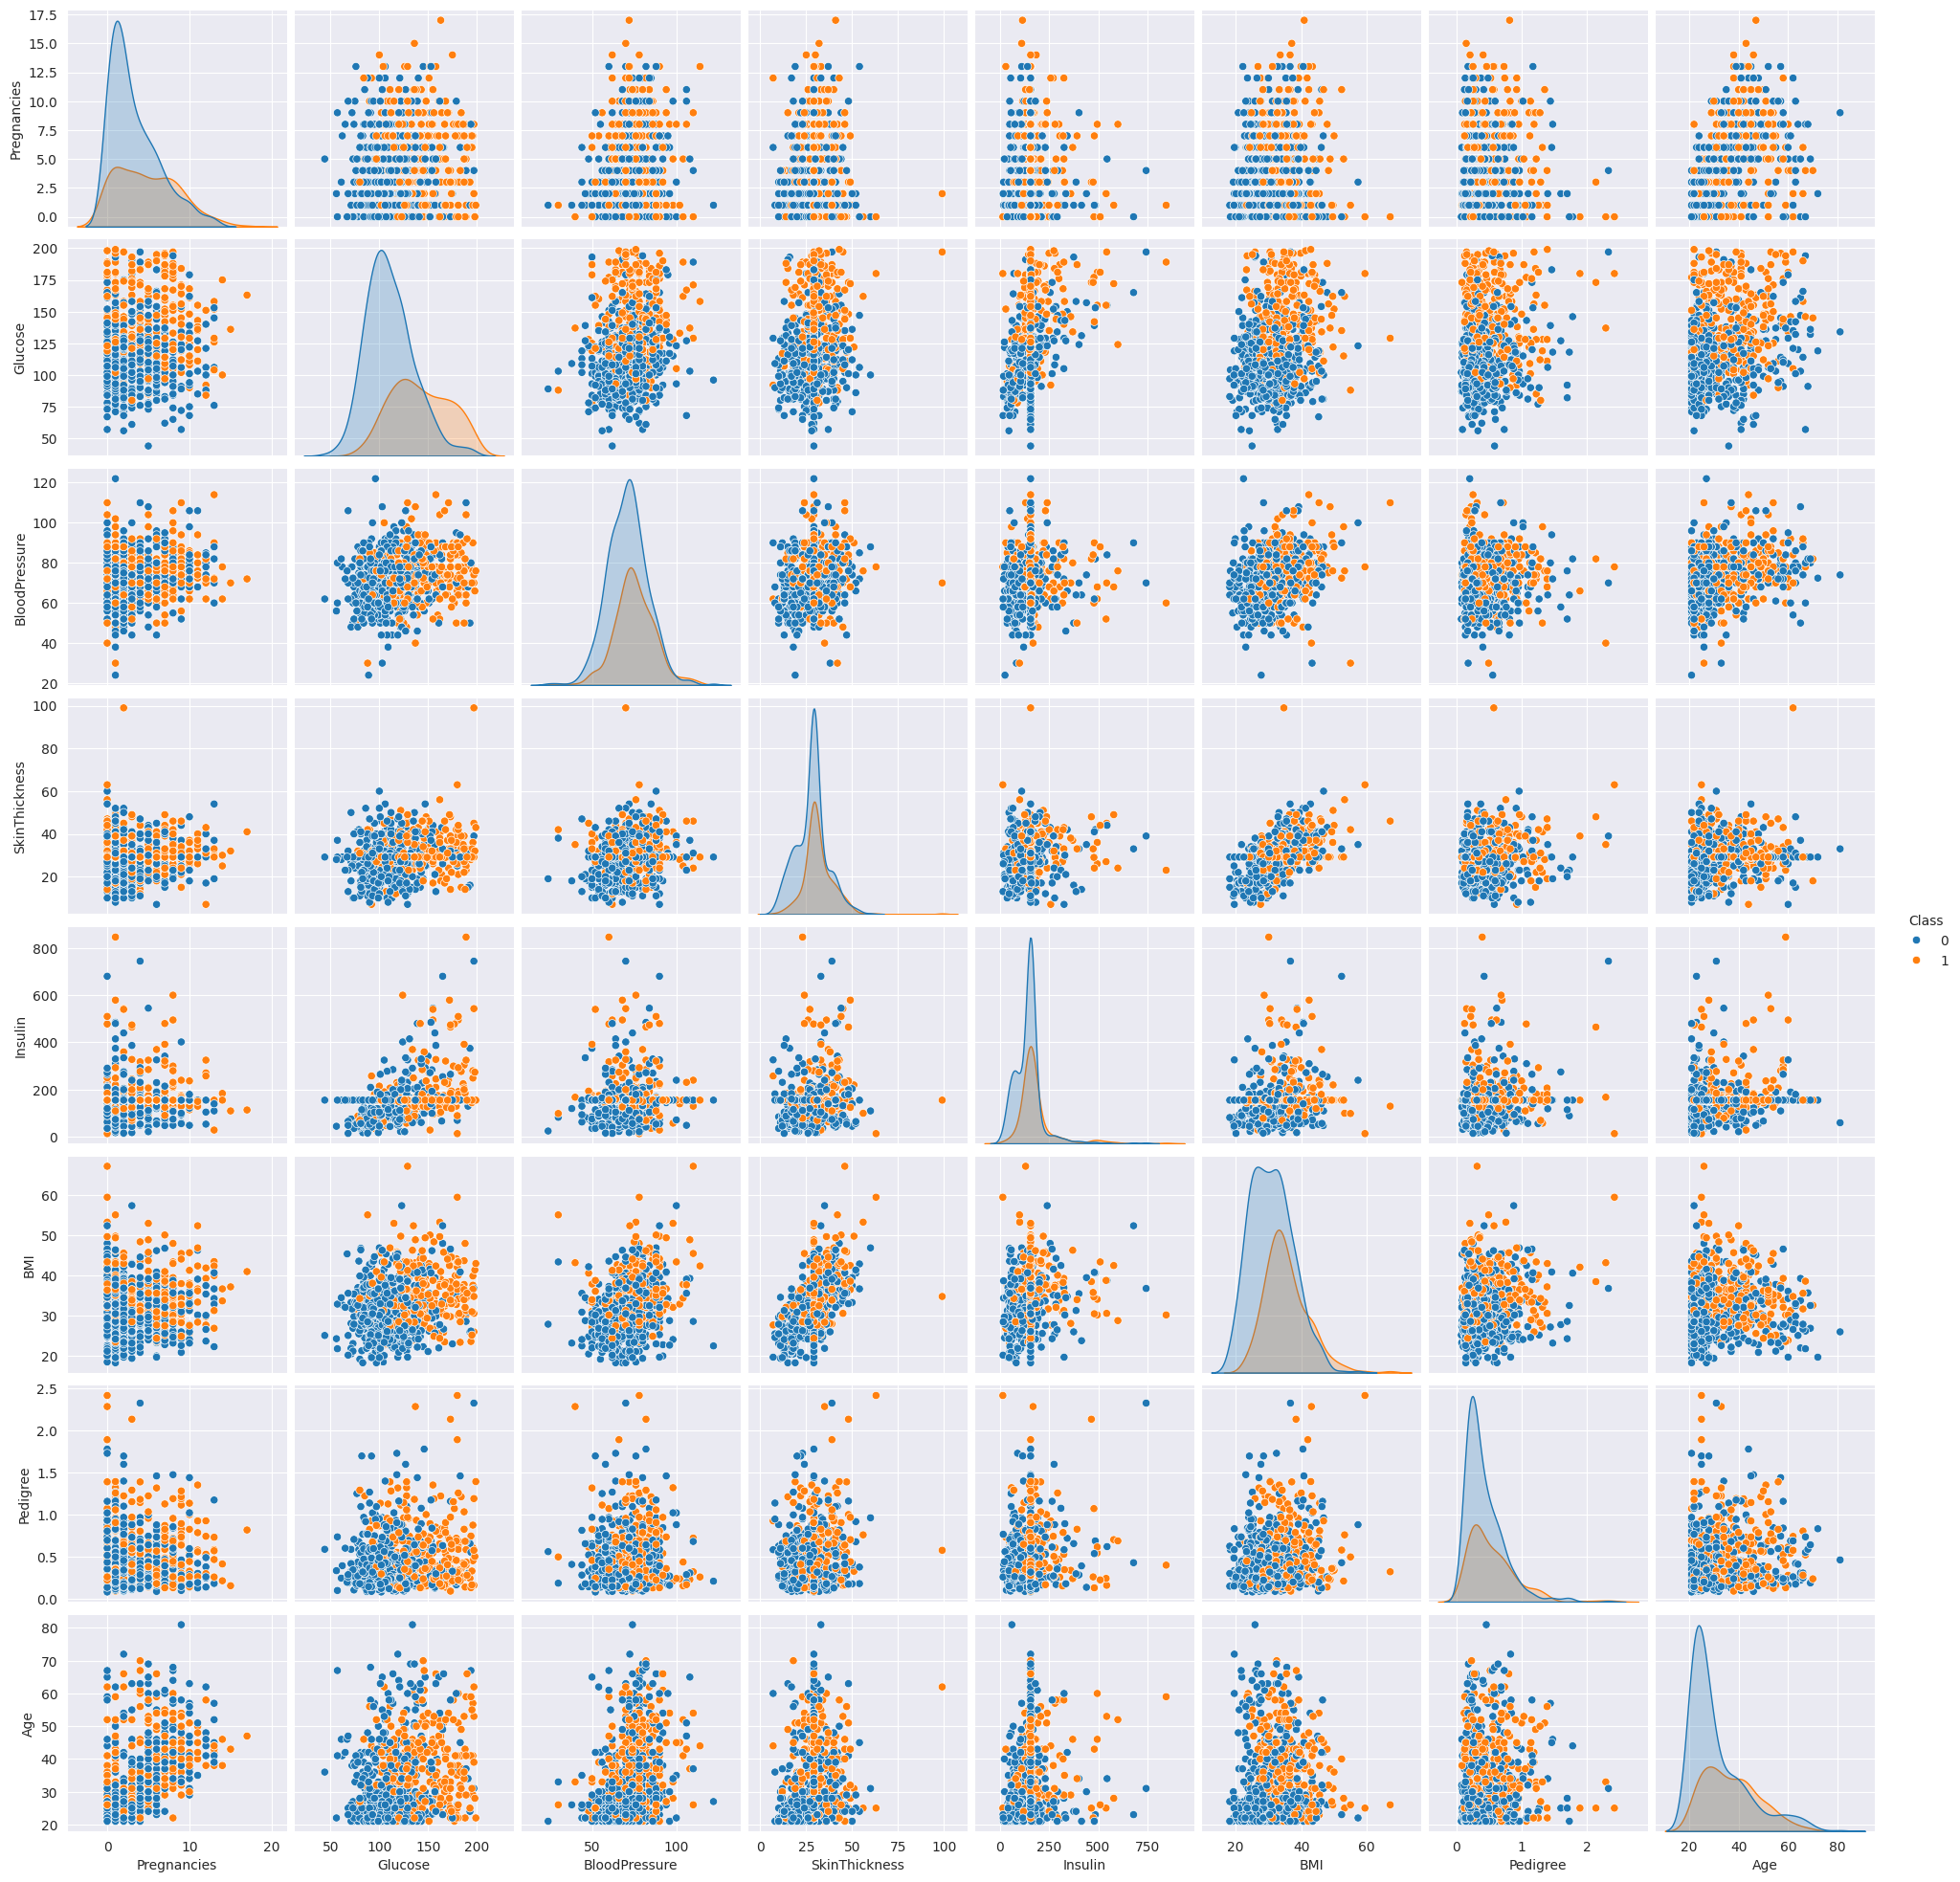

In [17]:
sns.pairplot(data, hue="Class")
plt.show()

* Pregnancy and Age have a linear relation.
* Age and Blood Pressure have little relation. Most of the aged people have Blood pressure.
* Insulin and Glucose have some relation.
* The distribution plots on diagonals for Class 0 and 1 have some overlap

### Let's look at the distribution of target variable

In [19]:
data["Class"].value_counts()

,count
Class,
0,500
1,268


In [21]:
data["Class"].value_counts(normalize = True)

,proportion
Class,
0,0.651042
1,0.348958


* The number of observations where the person is non-diabetic are 500 which is 65% of the total data available.

### Splitting data into train and test

In [22]:
X = data.drop(["Class"], axis=1)  ## Independent variable
Y = data["Class"]                 ## Dependent variable

# adding a contstant to X variable
X = add_constant(X)

# creating dummies
  # X = pd.get_dummies(X, drop_first=True)


# Splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.30, random_state=1, stratify=Y
)

**The Stratify argument maintains the original distribution of classes in the target variable while splitting the data into train and test sets.**

### Fitting Logistic Regression model

In [23]:
# fitting the model on training set
logit = sm.Logit(y_train, X_train)  # Make a model using logit function
lg = logit.fit()

Optimization terminated successfully.
         Current function value: 0.449508
         Iterations 6


In [24]:
# let's print the logistic regression summary
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3045
Time:                        16:52:17   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

* The coefficients of the logistic regression model are in terms of log(odd).
* `P>|z|`: The interpretation of p-values is similar to that in Linear Regression.

### Checking model performance

In [27]:
# predicting on training set
# default threshold is 0.5, if predicted probability is greater than 0.5 the observation will be classified as 1

pred_train = lg.predict(X_train) > 0.5
pred_train = np.round(pred_train)

#### Lets see the confusion matrix on training set

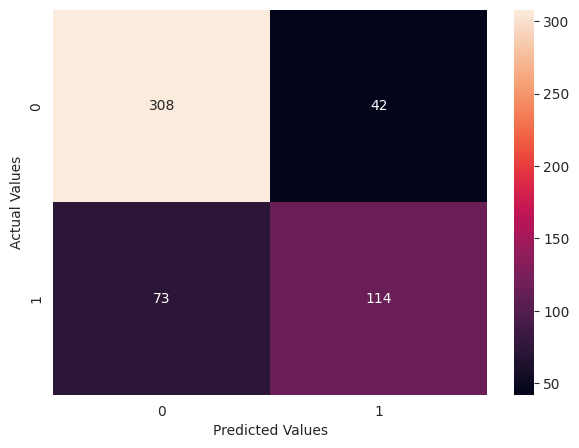

In [37]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

#### The confusion matrix

* True Positives (TP):  A person has diabetes and the model predicted person has diabetes.  =308
* True Negatives (TN): A person doesn't have diabetes and the model predicted person doesn't have diabetes. = 114
* False Positives (FP): The model predicted person has diabetes but the person doesn't have diabetes. = 42
* False Negatives (FN): The model predicted person doesn't have diabetes but the person has diabetes. = 73

#### Lets check the accuracy model

In [38]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train))

Accuracy on training set :  0.7858472998137802


* The model seems to be performing well on the training set.

### Checking for Multicollinearity ( Using VIF)

In [39]:
# let's check the VIF of the predictors
vif_series = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
    dtype=float,
)
print("VIF values: \n\n{}\n".format(vif_series))

VIF values: 

const            55.156267
Pregnancies       1.418041
Glucose           1.358583
BloodPressure     1.226593
SkinThickness     1.446856
Insulin           1.227806
BMI               1.546783
Pedigree          1.054447
Age               1.637294
dtype: float64



* We observe that there is no multicollinearity present in the data.
* Hence, The values of coefficient and p-values are reliable.
* Let's remove the insignificant variables (p-value > 0.05) from data.

### Removing insignificant variables (p-value > 0.05 )

In [40]:
# summary of initial logistic regression model
print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      528
Method:                           MLE   Df Model:                            8
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3045
Time:                        16:54:56   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.518e-41
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7226      1.021     -9.522      0.000     -11.724      -7.721
Pregnancies       0.1445      0.039      3.706      0.000       0.068       0.221
Glucose           0.0363      0.005     

 **Following variables have high p- values**
 - SkinThickness
 - BloodPressure
 - Insulin
 - Age


**We shouldn't drop all these variables at once. Drop one variable at a time and check the p-value in your new model summary**

**A:Dropping SkinThickness as it has the highest p-value**

In [41]:
# Drop skinthickness from the X_train data
X_train1 = X_train.drop("SkinThickness", axis=1)

In [42]:
# fitting the model on training set and checking the model performance
logit1 = sm.Logit(y_train, X_train1)
lg1 = logit1.fit()  # Our second model

pred_train1 = lg1.predict(X_train1)
pred_train1 = np.round(pred_train1)


print("Accuracy on training set : ", accuracy_score(y_train, pred_train1))

Optimization terminated successfully.
         Current function value: 0.449511
         Iterations 6
Accuracy on training set :  0.7858472998137802


In [43]:
difference = accuracy_score(y_train, pred_train1)- accuracy_score(y_train, pred_train)
difference

0.0

* There is no significant change in the model performance as compared to initial model.

In [44]:
# checking summary of the new model lg1
print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      529
Method:                           MLE   Df Model:                            7
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3045
Time:                        16:55:54   Log-Likelihood:                -241.39
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 4.406e-42
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -9.7189      1.018     -9.548      0.000     -11.714      -7.724
Pregnancies       0.1446      0.039      3.707      0.000       0.068       0.221
Glucose           0.0363      0.005     

We still have 3 variable with high p_value. Let's drop the BloodPressure variable

**Dropping Blood Pressure with the highest p-value**

In [45]:
X_train2 = X_train1.drop("BloodPressure", axis=1)

In [46]:
# fitting the model on training set
logit2 = sm.Logit(y_train, X_train2)
lg2 = logit2.fit()

pred_train2 = lg2.predict(X_train2)
pred_train2 = np.round(pred_train2)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train2))

Optimization terminated successfully.
         Current function value: 0.449630
         Iterations 6
Accuracy on training set :  0.7839851024208566


* There is no significant change in the model performance as compared to initial model.

In [47]:
## checking summary of the model
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      530
Method:                           MLE   Df Model:                            6
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3043
Time:                        16:55:59   Log-Likelihood:                -241.45
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 7.548e-43
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.8778      0.919    -10.744      0.000     -11.680      -8.076
Pregnancies     0.1442      0.039      3.702      0.000       0.068       0.220
Glucose         0.0361      0.005      7.837    

Insuline and Age have higher p-value. let's drop the insulin variable.

**Dropping Insulin with highest p-value**

In [48]:
X_train3 = X_train2.drop("Insulin", axis=1)

In [49]:
# fitting the model on training set
logit3 = sm.Logit(y_train, X_train3)
lg3 = logit3.fit()

pred_train3 = lg3.predict(X_train3)
pred_train3 = np.round(pred_train3)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train3))

Optimization terminated successfully.
         Current function value: 0.450056
         Iterations 6
Accuracy on training set :  0.7858472998137802


* There is no significant change in the model performance as compared to initial model.

In [50]:
## checking summary of the model
print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      531
Method:                           MLE   Df Model:                            5
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3037
Time:                        16:56:04   Log-Likelihood:                -241.68
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 1.378e-43
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.8936      0.921    -10.746      0.000     -11.698      -8.089
Pregnancies     0.1440      0.039      3.686      0.000       0.067       0.221
Glucose         0.0372      0.004      8.584    

**Dropping Age with highest p-value**

In [51]:
X_train4 = X_train3.drop("Age", axis=1)

In [52]:
# fitting the model on training set
logit4 = sm.Logit(y_train, X_train4)
lg4 = logit4.fit()

pred_train4 = lg4.predict(X_train4)
pred_train4 = np.round(pred_train4)

print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Optimization terminated successfully.
         Current function value: 0.451011
         Iterations 6
Accuracy on training set :  0.7821229050279329


* There is no significant change in the model performance as compared to initial model.

In [53]:
## checking summary of the model
print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                  537
Model:                          Logit   Df Residuals:                      532
Method:                           MLE   Df Model:                            4
Date:                Sun, 08 Feb 2026   Pseudo R-squ.:                  0.3022
Time:                        16:56:08   Log-Likelihood:                -242.19
converged:                       True   LL-Null:                       -347.09
Covariance Type:            nonrobust   LLR p-value:                 2.951e-44
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -9.6760      0.890    -10.873      0.000     -11.420      -7.932
Pregnancies     0.1645      0.034      4.881      0.000       0.098       0.231
Glucose         0.0381      0.004      8.943    

* Now all the columns left are significant predictors, let's check the model performance and make interpretations.

### Coefficient interpretations

* Coefficient of all the variables are positive. These coefficients are log odd values and are not easy to interpret. So, let's change these values to odds.

###  Converting coefficients to odds

* **odds =  exp(b)**
* The percentage change in odds is given as **odds = (exp(b) - 1) * 100**

**Odds from coefficients**

In [54]:
# converting coefficients to odds
odds = np.exp(lg4.params)

# adding the odds to a dataframe
pd.DataFrame(odds, X_train4.columns, columns=["odds"]).T

,const,Pregnancies,Glucose,BMI,Pedigree
odds,0.000063,1.178781,1.038845,1.097174,2.841249


**Percentage change in odds**

In [55]:
# finding the percentage change
perc_change_odds = (np.exp(lg4.params) - 1) * 100

# adding the change_odds% to a dataframe
pd.DataFrame(perc_change_odds, X_train4.columns, columns=["change_odds%"]).T

,const,Pregnancies,Glucose,BMI,Pedigree
change_odds%,-99.993723,17.878143,3.884519,9.717385,184.124936


### Coefficient interpretations

* `Pregnancies`: Holding all other features constant, a unit change in Pregnancy will increase the odds of a person having diabetes by 1.787 times or a 17.87% increase in the odds of having diabetes.

* `Glucose`: Holding all other features constant, a unit change in Glucose will increase the odds of a person having diabetes by 1.03 times or a 3.88% increase in the odds of having diabetes.

* `BMI`: Holding all other features constant, a unit change in BMI will increase the odds of a person having diabetes by 1.097 times or a 9.71% increase in the odds of having diabetes.

* `Pedigree`: Holding all other features constant, a unit change in Pedigree will increase the odds of a person having diabetes by 2.84 times or a 184.12% increase in the odds of having diabetes.

### Performance Metrics of the final model - 'lg4'

**Confusion Matrix on training set**

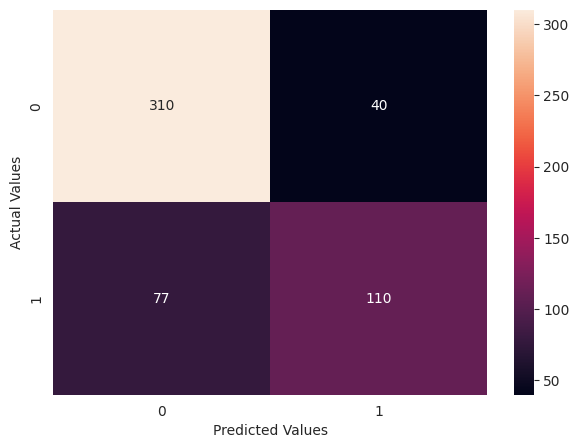

In [56]:
cm = confusion_matrix(y_train, pred_train4)
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt="g")
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.show()

**Accuracy on training set**

In [57]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))

Accuracy on training set :  0.7821229050279329


### We can now use the model for making predictions on the test data.

In [58]:
# dropping variables from test set as well which were dropped from training set
X_test = X_test.drop(["SkinThickness", "BloodPressure", "Insulin", "Age"], axis=1)

In [59]:
pred_test = lg4.predict(X_test) > 0.5  # Set a threshold of 0.5
pred_test = np.round(pred_test)

In [60]:
print("Accuracy on training set : ", accuracy_score(y_train, pred_train4))
print("Accuracy on test set : ", accuracy_score(y_test, pred_test))

Accuracy on training set :  0.7821229050279329
Accuracy on test set :  0.7489177489177489


* The model performance with  the training data is 78% accuracy.
* The model performance with the test data is 74%. This implies that if our model is exposed to any unknow data it will predict the risk of diabetes 74% of the time accurately.